In [1]:
import os
os.chdir("../")

In [2]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import torch
import matplotlib.pylab as plt

from sklearn.datasets import load_breast_cancer
from gpytorch.kernels import RBFKernel

from src.gp_models.VariationalGPRegression import VariationalGPRegression
from src.explanation_algorithms.BayesGPSHAP import BayesGPSHAP
from src.utils.visualisation.deterministic_values import summary_plot
from src.utils.visualisation.stochastic_values import local_explanation_plot

In [3]:
breast_cancer = load_breast_cancer()
X, y, feature_names = breast_cancer.data, breast_cancer.target, breast_cancer.feature_names
X, y = torch.tensor(X).float(), torch.tensor(y).float()

# Standardise
scale = y.std().numpy()
y = (y - y.mean()) / y.std()

In [6]:
kernel = RBFKernel
gp_regression = VariationalGPRegression(
    X, y, kernel=kernel, num_inducing_points=150, batch_size=64
)
gp_regression.fit(learning_rate=1e-4, training_iteration=1000)

Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

### Sanity Check

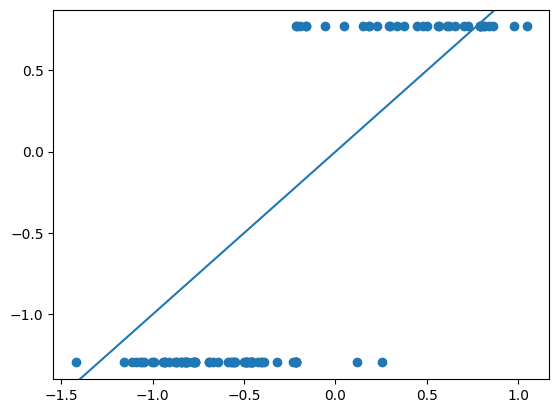

In [8]:
y_test = y[:100]
test_mean, test_cov = gp_regression.compute_posterior_mean_and_covariance_of_data(X[:100], likelihood=None)

plt.scatter(test_mean.numpy(), y_test.numpy())
plt.axline((0,0), slope=1)

## Explanation

In [ ]:
explanation_instances = X[:1000]
bayes_gpshap = BayesGPSHAP(train_X=X,
                           scale=scale,
                           model=gp_regression,
                           kernel=kernel(),
                           include_likelihood_noise_for_explanation=False)

bayes_gpshap.fit_bayesgpshap(explanation_instances, num_coalitions=2**16)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65537/65537 [01:36<00:00, 679.15it/s]
